<a href="https://colab.research.google.com/github/jcsnuesi/Car-price-prediction-/blob/main/Car_price_prediction_Parte_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [149]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, classification_report,precision_score,recall_score,accuracy_score, plot_confusion_matrix, confusion_matrix

In [184]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [162]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [161]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [163]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [169]:
print(df.fueltype.value_counts(), '\n')
print(df.doornumber.value_counts(), '\n')
print(df.enginelocation.value_counts(), '\n')
print(df.cylindernumber.value_counts(), '\n')
print(df.fuelsystem.value_counts(), '\n')

gas       185
diesel     20
Name: fueltype, dtype: int64 

four    115
two      90
Name: doornumber, dtype: int64 

front    202
rear       3
Name: enginelocation, dtype: int64 

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64 

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64 



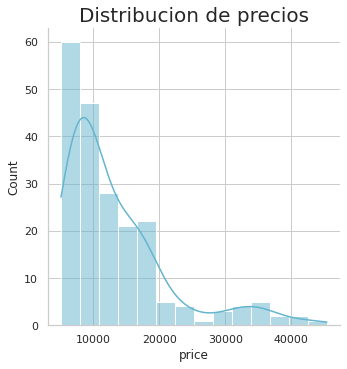

In [171]:
sns.set(style='whitegrid')

sns.displot(df['price'], kde = True, color = 'c')
plt.title('Distribucion de precios', size=20)

plt.show()

Text(0, 0.5, 'Precio')

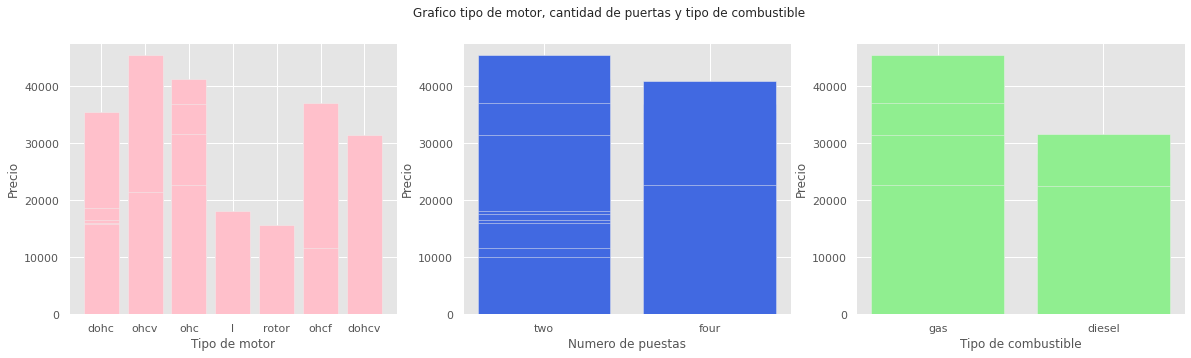

In [183]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))

fig.suptitle('Grafico tipo de motor, cantidad de puertas y tipo de combustible')
plt.subplot(1,3,1)
plt.bar(df.enginetype, df.price, color='pink')
plt.xlabel("Tipo de motor")
plt.ylabel("Precio")

plt.subplot(1,3,2)
plt.bar(df.doornumber, df.price, color='royalblue')
plt.xlabel("Numero de puestas")
plt.ylabel("Precio")

plt.subplot(1,3,3)
plt.bar(df.fueltype, df.price, color='lightgreen')
plt.xlabel("Tipo de combustible")
plt.ylabel("Precio")


In [191]:
ordinal_coding = ['fueltype','doornumber','enginelocation','cylindernumber','fuelsystem']
col_data_replace_dict = {}

for i in range(0,len(ordinal_coding)):

    col_value = df[ordinal_coding[i]].value_counts().index
    for inc in range(0, len(col_value)):
      col_data_replace_dict[col_value[inc]] = inc
      df[ordinal_coding[i]] = df[ordinal_coding[i]].replace(col_data_replace_dict)

df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,1,convertible,rwd,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,1,convertible,rwd,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,1,hatchback,rwd,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,0,sedan,fwd,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,0,sedan,4wd,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,std,0,sedan,rwd,0,109.1,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,turbo,0,sedan,rwd,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,std,0,sedan,rwd,0,109.1,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,1,turbo,0,sedan,rwd,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [266]:
X = df.drop(columns=['boreratio',	'stroke',	'compressionratio','enginesize','wheelbase','CarName', 'car_ID',	'symboling'	,'carlength', 'carwidth', 'carheight', 'curbweight','horsepower','peakrpm'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

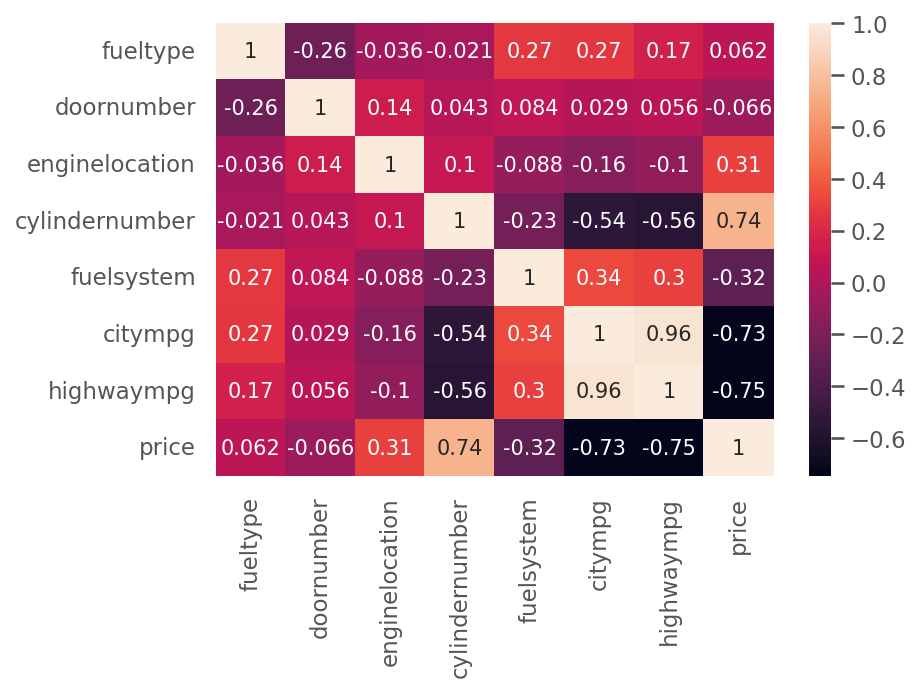

In [280]:
plt.figure(dpi=150)
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [281]:
fig = px.bar(df, x="carbody", y="price", color=df['carbody'], title='Precio de vehiculos en base a su modelo')
fig.show()

In [282]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137, 12)
(68, 12)
(137,)
(68,)


In [283]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train, y_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)


In [284]:
print(X_train.shape)
print(X_test.shape)

(137, 216)
(68, 216)


In [285]:
scaler = StandardScaler()

In [286]:
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_scaler

array([[ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929],
       [ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929],
       [ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929],
       ...,
       [ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929],
       [ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929],
       [ 0.29546842, -0.29546842,  0.47245559, ..., -0.08574929,
        -0.08574929, -0.08574929]])

In [287]:
X_train

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [291]:
lgreg = RandomForestRegressor(n_estimators=100)
lgreg.fit(X_train,y_train)

X_train_lg = lgreg.score(X_train, y_train)
X_test_lg = lgreg.score(X_test, y_test)

pred = lgreg.predict(X_train)

print('Rendimiendo datos de entremaniento:',X_train_lg, '\n')
print('Rendimiendo datos de prueba:', X_test_lg, '\n')
print('Predicciones de los datos de entrenamiento: \n',pred)

Rendimiendo datos de entremaniento: 0.9669874330675795 

Rendimiendo datos de prueba: 0.7738057697339509 

Predicciones de los datos de entrenamiento: 
 [18538.74   8799.055  7026.83  17176.63   8110.53   6275.76  15674.59
 10294.74  12606.24  13544.83   6555.02   8485.94   7487.86  17357.88
 16557.29  16928.58  17305.715  6304.5   10815.86   7487.86  31820.485
  7738.29   5576.69   7486.28  16360.43   9618.07   6378.44  14478.27
 11726.38   6719.76  15848.8   18161.91   9699.615 18601.85   9473.36
 31007.02  15853.65   7278.57  19103.03   6799.59  13481.85   9554.76
 16014.81   7998.72  15261.84   9747.89   5885.755  5938.965 12976.76
 14186.53   8434.32   8478.49  28517.11  23681.045 10509.35   7768.27
 11380.63   8715.68   9627.06  14707.86   8715.68   9071.58   8840.655
 10919.26   8229.72   8954.67  15541.2   31647.645  6879.91   8283.35
  8845.52   7687.08  12077.1   19644.995  6783.93  12673.57   8796.6
  8079.195 10002.75  29618.505  9667.575  6962.46  19210.465 14671.61
  6571

1) Fuente de datos

Kaggle - car price prediction

2) Breve descripción de datos

 205 Filas, 25 Columnas.
 No existes datos nulos
 Columnas categorias y numericas

3) ¿Cuál es el objetivo?

Entrenar nuestro modelo para la prediccion de precios de vehiculos en base a sus caracteristicas.

4) ¿Este es un problema de clasificación o regresión?

Este es un problema de regresion, debido que tenemos que obtener un valor en base a las caracteristicas de los datos de los vehiculos.

5) ¿Cuántas características hay?

Columnas object, interger y float

6) ¿Cuántas filas de datos hay?

205 filas

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Primero tuve que hacer una codificacion ordinal a las columnas con valores con orden secuencial, como resultado el tipo de dato cambio de object a int, luego procedia a una codificacion one hot para la columnas categoricas no ordenadas gerarquicamente y por ultimo escalamiento de los valores para en mejor manejo de la data. Todo esto antes de instancia el modelo.

In [292]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Parte 2